In [1]:
# import libraries
from qiskit import QuantumCircuit, transpile

# Quantum Circuit
from qiskit.primitives import Sampler

# Run with simulators
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Visualzation
from qiskit.visualization import plot_histogram


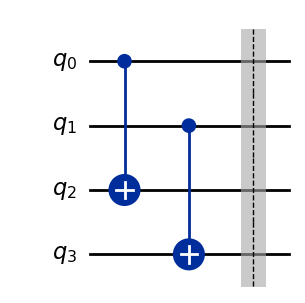

In [2]:
# Create a 2 Qubit Oracle
s="00"

n = len(s)

simon2s00 = QuantumCircuit(n*2)

for q in range(n):
    simon2s00.cx(q, q+n)
    
simon2s00.barrier()

# Draw the Circuit
simon2s00.draw('mpl')

In [3]:
def simon_oracle(s):
    
    n = len(s)
    s = s[::-1]
    
    qc = QuantumCircuit(2*n)
    
    # Copy the values into the registers (U_f1)
    for q in range(n):
        qc.cx(q, q+n)
    
    # Check if it's the 1 to 1 mapping case (All Zeros)
    if '1' not in s:
        return qc
    
    # Create the U_f2 oracle
    # Find the first index of 1 occuring
    i = s.find('1') 
    
    for q in range(n):
        if s[q] == '1':
            qc.cx(i, (q)+n)
    
    return qc
    

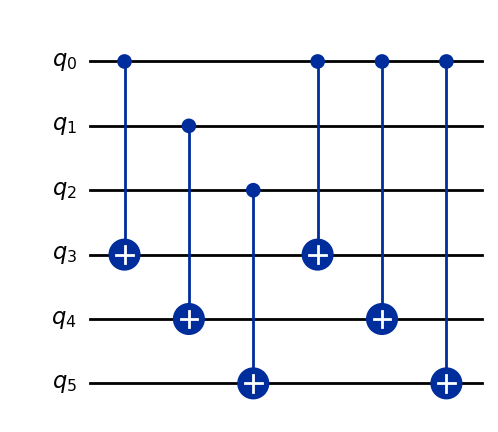

In [4]:
simon_oracle("111").draw('mpl')

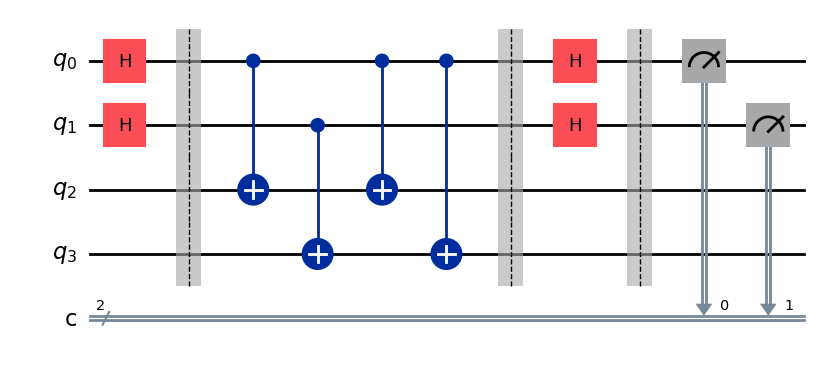

In [6]:
s = "11"

n = len(s)

simon_circuit2 = QuantumCircuit(2*n, n)

simon_circuit2.h(range(n))
simon_circuit2.barrier()

simon_circuit2 = simon_circuit2.compose(simon_oracle(s))

simon_circuit2.barrier()

simon_circuit2.h(range(n))
simon_circuit2.barrier()

simon_circuit2.measure(range(n), range(n))

simon_circuit2.draw('mpl')

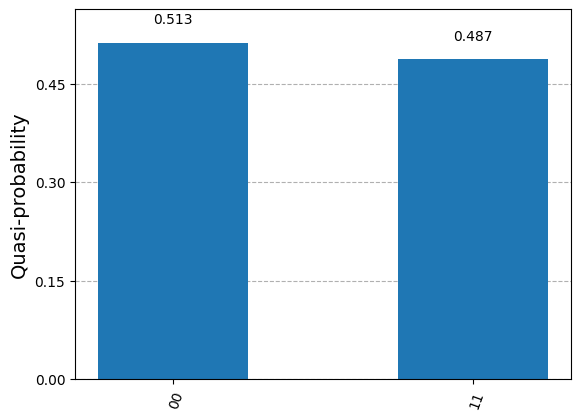

In [9]:
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

sampler = AerSampler()

job_sim = sampler.run([simon_circuit2], shots=1024)
quasi_dists = job_sim.result().quasi_dists[0].binary_probabilities()

# plot the results
plot_histogram(quasi_dists)